In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.contingency_tables import mcnemar

In [58]:
# CSI1
person = [0.7785934, 0.7902058, 0.8144967, 0.7993604, 0.6957953, 0.78516525, 0.81369853, 0.74844253]
person_rand = [0.4997632, 0.53151315, 0.4953193, 0.48565182, 0.51492274, 0.50330985, 0.47631958, 0.5]
face = [0.83686125, 0.8601667, 0.84533286, 0.8287057, 0.75272024, 0.88401073, 0.8057525, 0.8155809]
face_rand = [0.50652635, 0.49794447, 0.6964292, 0.5, 0.57799053, 0.4734094, 0.5340897, 0.5132827]
animal = [0.728, 0.778, 0.832, 0.724, 0.685, 0.763, 0.760, 0.822]
animal_rand = [0.490, 0.518, 0.467, 0.506, 0.492, 0.492, 0.490, 0.460]
vehicle = [0.63666004, 0.7749062, 0.70542634, 0.6765815, 0.5861905, 0.66044986, 0.637699, 0.72237015]
vehicle_rand = [0.51243365, 0.46709448, 0.5088834, 0.5, 0.4573095, 0.5398707, 0.5137987, 0.5396303]
outdoor = [0.6075605, 0.595832, 0.58580244, 0.61947834, 0.48774514, 0.68280077, 0.64264286, 0.64079547]
outdoor_rand = [0.4352548, 0.47683832, 0.54090405, 0.4749565, 0.50131303, 0.49639726, 0.45271426, 0.3698519]
sports = [0.67907643, 0.8179509, 0.8033872, 0.7283197, 0.6249999, 0.7426069, 0.67639476, 0.7721769]
sports_rand = [0.4761905, 0.5304762, 0.50676864, 0.5143444, 0.50541246, 0.5006824, 0.4957806, 0.49680126]
food = [0.83188015, 0.7146096, 0.78497267, 0.7598106, 0.7156991, 0.71799564, 0.777656, 0.76861054]
food_rand = [0.4390853, 0.54637724, 0.5690207, 0.49045455, 0.5523299, 0.5573561, 0.48547196, 0.44132835]
furniture = [0.74236554, 0.63419354, 0.67153484, 0.56088924, 0.6056729, 0.6840717, 0.6891775, 0.6668134]
furniture_rand = [0.5313172, 0.49489248, 0.47832003, 0.49440512, 0.42427492, 0.56255865, 0.52089465, 0.49288598]
tool = [0.63215446, 0.6133107, 0.6596611, 0.5776302, 0.60100305, 0.5842055, 0.58849084, 0.58240765]
tool_rand = [0.5460421, 0.5170847, 0.47180894, 0.5039796, 0.4977509, 0.4730363, 0.4816711, 0.495408]

In [59]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [60]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [61]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    s = 100*np.array([u,v])
    print(mcnemar(s, exact=False, correction=False))
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

face :
t-statistic: 10.11598979645343 p-value: 4.048212655325941e-08
animal :
t-statistic: 14.485996688747932 p-value: 4.0327720375866824e-10
person :
t-statistic: 18.272385980721282 p-value: 1.8229482953080907e-11
furniture :
t-statistic: 6.424601156575583 p-value: 7.940906584404202e-06
vehicle :
t-statistic: 7.301613495177112 p-value: 1.9499300348921045e-06
sports :
t-statistic: 9.325960202953269 p-value: 1.1007113032725453e-07
food :
t-statistic: 10.48336492617673 p-value: 2.5948253991602724e-08
outdoor :
t-statistic: 5.123433637760139 p-value: 7.743513102378257e-05
tool :
t-statistic: 7.945035076865092 p-value: 7.418784360360348e-07
pvalue      0.5321367408455
statistic   0.39030953700719945
Bonferroni:

Reject: [ True  True  True  True  True  True  True  True  True]
pvals corrected: [3.64339139e-07 3.62949483e-09 1.64065347e-10 7.14681593e-05
 1.75493703e-05 9.90640173e-07 2.33534286e-07 6.96916179e-04
 6.67690592e-06]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  T

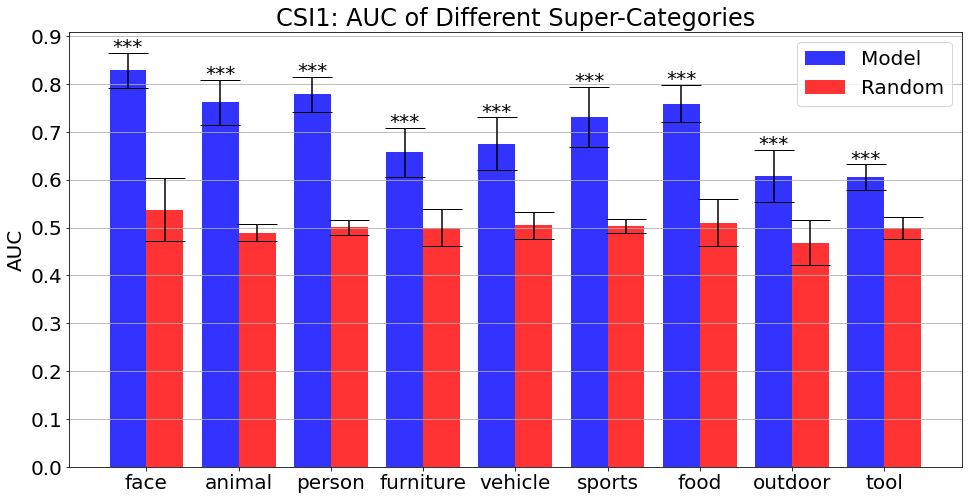

In [62]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories1 = categories
categories1_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI1: AUC of Different Super-Categories', leg_loc='upper right')

In [63]:
# CSI2
person = [0.698701, 0.687531, 0.6658986, 0.7750946, 0.6723981, 0.6289042, 0.66271806, 0.75362545]
person_rand = [0.5151889, 0.551708, 0.4977862, 0.4847129, 0.50429857, 0.49068326, 0.5021216, 0.5319308]
face = [0.7179583, 0.8204029, 0.85288906, 0.85607857, 0.8059592, 0.7545908, 0.7189794, 0.70609695]
face_rand = [0.53421175, 0.45776162, 0.45535472, 0.5, 0.4626168, 0.51034504, 0.4985836, 0.47008306]
animal = [0.7271656, 0.70883465, 0.62890434, 0.609156, 0.6617983, 0.56853884, 0.7036111, 0.711913]
animal_rand = [0.46187112, 0.48287946, 0.46849206, 0.51613235, 0.47159833, 0.48257545, 0.48870373, 0.5]
vehicle = [0.53068835, 0.6348579, 0.57495767, 0.641196, 0.6298109, 0.5961196, 0.6005344, 0.48655573]
vehicle_rand = [0.49987233, 0.49131218, 0.46096393, 0.4834609, 0.580454, 0.46171975, 0.52910584, 0.5040393]
outdoor = [0.5721003, 0.6079744, 0.5837378, 0.58028287, 0.5116956, 0.5325, 0.6007536, 0.59433204]
outdoor_rand = [0.55257314, 0.5514286, 0.54634124, 0.44655, 0.47217086, 0.46592855, 0.4096232, 0.46779278]
sports = [0.7095126, 0.69620854, 0.7117042, 0.6943243, 0.7372007, 0.68981963, 0.778625, 0.6632523]
sports_rand = [0.55491054, 0.46238324, 0.51306915, 0.43360442, 0.5173449, 0.58567226, 0.47421876, 0.4773727]
food = [0.60216343, 0.616281, 0.64354795, 0.6461636, 0.68864954, 0.6861432, 0.6974642, 0.6202813]
food_rand = [0.52806026, 0.50336874, 0.4771322, 0.5866756, 0.5006496, 0.47071958, 0.49514434, 0.5746973]
furniture = [0.60508454, 0.59410155, 0.68052745, 0.63709986, 0.570177, 0.60191375, 0.5407566, 0.5456711] 
furniture_rand = [0.45555878, 0.46791855, 0.5088205, 0.52533495, 0.5135959, 0.4929112, 0.5327365, 0.443255]
tool = [0.5475229, 0.61794984, 0.5295947, 0.5524333, 0.61519575, 0.5180483, 0.51402867, 0.454988]
tool_rand = [0.47109246, 0.4911581, 0.5816939, 0.5061405, 0.45576754, 0.48623955, 0.47052434, 0.47648233]

face :
t-statistic: 12.090315605100667 p-value: 4.24727716814607e-09
animal :
t-statistic: 8.494813598743825 p-value: 3.3818792704455196e-07
person :
t-statistic: 9.659844209710787 p-value: 7.158162334977391e-08
furniture :
t-statistic: 5.151155054130309 p-value: 7.359106590012739e-05
vehicle :
t-statistic: 3.6101429339908164 p-value: 0.001420368680015574
sports :
t-statistic: 9.593348728914478 p-value: 7.791608835652925e-08
food :
t-statistic: 6.653639891604272 p-value: 5.448229623106348e-06
outdoor :
t-statistic: 3.7105655699712257 p-value: 0.0011640565280771618
tool :
t-statistic: 2.1799295288108103 p-value: 0.023413558270371934
pvalue      0.15935121042674774
statistic   1.9803721178198868
Bonferroni:

Reject: [ True  True  True  True  True  True  True  True False]
pvals corrected: [3.82254945e-08 3.04369134e-06 6.44234610e-07 6.62319593e-04
 1.27833181e-02 7.01244795e-07 4.90340666e-05 1.04765088e-02
 2.10722024e-01]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  Tru

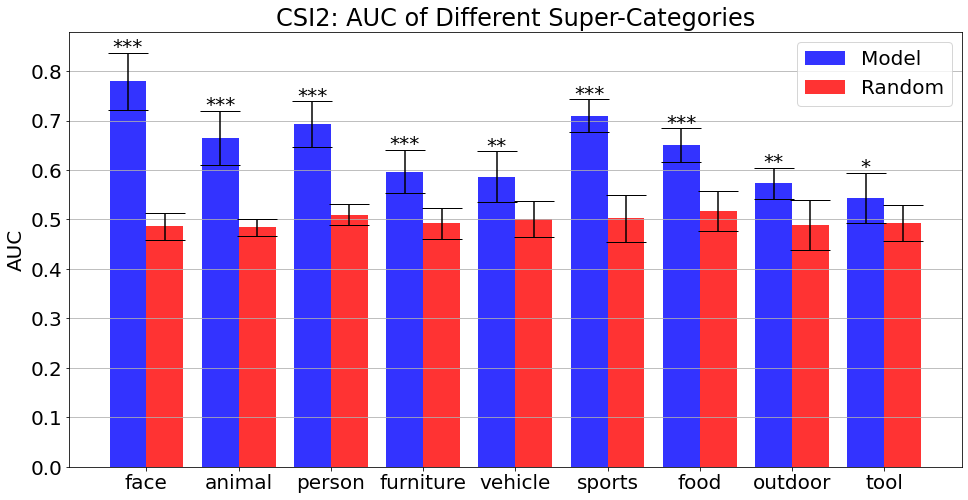

In [64]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories2 = categories
categories2_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI2: AUC of Different Super-Categories', leg_loc='upper right')

In [65]:
# CSI3
person = [0.73657066, 0.7899575, 0.83204234, 0.6706596, 0.74448764, 0.7452014, 0.67623407, 0.8098127]
person_rand = [0.5423047, 0.52859795, 0.539797, 0.49282447, 0.49443612, 0.5167582, 0.51819956, 0.45202836]
face = [0.8140332, 0.804817, 0.8537963, 0.83140254, 0.8012073, 0.5226083, 0.70742464, 0.7795297]
face_rand = [0.50395006, 0.52077967, 0.48690742, 0.5777158, 0.46656117, 0.48747486, 0.520511, 0.5046437]
animal = [0.6985625, 0.7225093, 0.72699285, 0.6639425, 0.73905176, 0.7592316, 0.65458024, 0.583664] 
animal_rand = [0.5015274, 0.44966388, 0.5, 0.5434989, 0.48686913, 0.5, 0.5152782, 0.4556878]
vehicle = [0.6509918, 0.5860607, 0.6507844, 0.63255376, 0.6108348, 0.60216635, 0.59735996, 0.6277965]
vehicle_rand = [0.5, 0.5201903, 0.5294644, 0.47392473, 0.48562524, 0.64231426, 0.46785492, 0.5600881]
outdoor = [0.5451518, 0.48978662, 0.5930882, 0.62609655, 0.5434078, 0.62872547, 0.5356879, 0.6514205]
outdoor_rand = [0.47844705, 0.5134493, 0.52450985, 0.5083542, 0.4302991, 0.35294116, 0.47642383, 0.5344697]
sports = [0.7767295, 0.6188866, 0.8350569, 0.66835225, 0.7279095, 0.6431989, 0.61759377, 0.61165625]
sports_rand = [0.5511309, 0.48637968, 0.5589552, 0.39420313, 0.57975286, 0.44696236, 0.5244375, 0.4964024]
food = [0.4997505, 0.64180386, 0.74596405, 0.6946653, 0.7082302, 0.736319, 0.51492846, 0.7245387]
food_rand = [0.4794993, 0.5080029, 0.5920276, 0.5746579, 0.45513862, 0.43342483, 0.43666834, 0.52939165]
furniture = [0.6133653, 0.60130477, 0.6382857, 0.65911585, 0.6193983, 0.6725537, 0.6121014, 0.56253016]
furniture_rand = [0.40850404, 0.5667951, 0.47054762, 0.5605313, 0.49749768, 0.5589516, 0.48615548, 0.46340963]
tool = [0.57276714, 0.55150145, 0.58190495, 0.49504068, 0.5078096, 0.60690856, 0.50547713, 0.53658533]
tool_rand = [0.55220795, 0.4543299, 0.5698043, 0.4713034, 0.48071432, 0.526371, 0.46730068, 0.5087108]

face :
t-statistic: 6.464993919913304 p-value: 7.426574723403292e-06
animal :
t-statistic: 8.713951038545707 p-value: 2.4970167164613494e-07
person :
t-statistic: 10.34222503332974 p-value: 3.0738211731686566e-08
furniture :
t-statistic: 5.15863520879029 p-value: 7.25881555722715e-05
vehicle :
t-statistic: 4.416653971195354 p-value: 0.0002928722839771183
sports :
t-statistic: 4.954166567509544 p-value: 0.00010589969641539022
food :
t-statistic: 3.8408233108644905 p-value: 0.0008999102996798797
outdoor :
t-statistic: 3.3997531701622172 p-value: 0.002157504537577917
tool :
t-statistic: 1.9710014090969916 p-value: 0.03441189905411289
pvalue      0.9946343593496131
statistic   4.5224064414066616e-05
Bonferroni:

Reject: [ True  True  True  True  True  True  True  True False]
pvals corrected: [6.68391725e-05 2.24731504e-06 2.76643906e-07 6.53293400e-04
 2.63585056e-03 9.53097268e-04 8.09919270e-03 1.94175408e-02
 3.09707091e-01]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  T

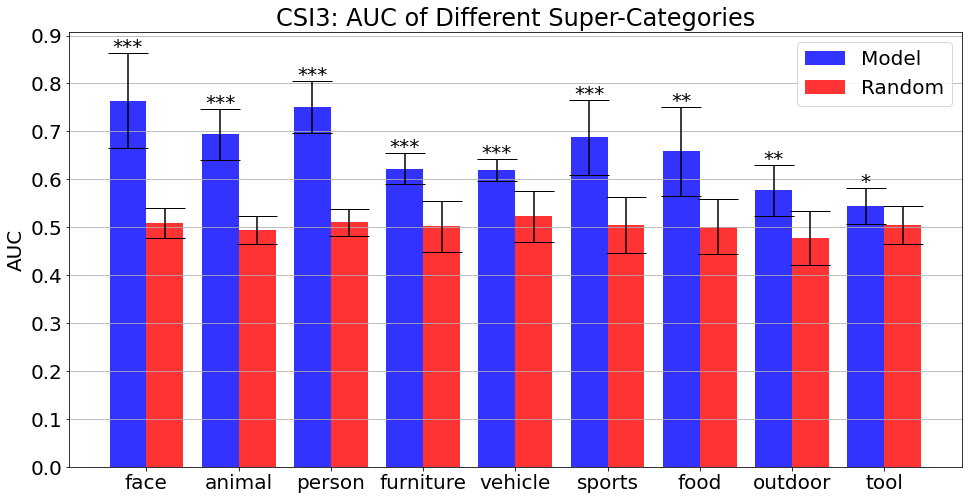

In [66]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories3 = categories
categories3_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI3: AUC of Different Super-Categories', leg_loc='upper right')

In [67]:
# CSI4
person = [0.6193367, 0.5020757, 0.59484756, 0.571134, 0.55813, 0.53112507, 0.5810789, 0.6791647]
person_rand = [0.57309324, 0.5028083, 0.46036926, 0.5695258, 0.49375868, 0.53459245, 0.5588739, 0.4913977]
face = [0.6680467, 0.5949883, 0.72449845, 0.632439, 0.66730464, 0.67605066, 0.64397717, 0.77190286]
face_rand = [0.47435898, 0.55337024, 0.5457751, 0.5322784, 0.4926635, 0.514076, 0.5680175, 0.53194755]
animal = [0.5886571, 0.45369917, 0.6401848, 0.44245523, 0.6515032, 0.6079745, 0.49351743, 0.67366946]
animal_rand = [0.572142, 0.5308672, 0.43402287, 0.4326513, 0.48027092, 0.49787349, 0.501539, 0.45451868]
vehicle = [0.5327381, 0.48596182, 0.5553035, 0.47487214, 0.6069795, 0.53078693, 0.54100275, 0.58910316]
vehicle_rand = [0.5234788, 0.5086619, 0.482087, 0.5178963, 0.5470537, 0.4728801, 0.43111262, 0.5445516]
outdoor = [0.5644841, 0.6071428, 0.44629857, 0.46126235, 0.46140602, 0.5029816, 0.5702367, 0.5504467]
outdoor_rand = [0.4513889, 0.59940475, 0.5573423, 0.574505, 0.528264, 0.49274045, 0.4370449, 0.42590645]
sports = [0.60649663, 0.62246037, 0.41779986, 0.5503497, 0.5889762, 0.6208557, 0.6996711, 0.6225157]
sports_rand = [0.50542766, 0.5515623, 0.44912148, 0.4881259, 0.37904236, 0.5576776, 0.5064145, 0.54654086]
food = [0.55437106, 0.5676142, 0.47269416, 0.45904604, 0.5348863, 0.6337131, 0.5183823, 0.4857143]
food_rand = [0.47097844, 0.582132, 0.509102, 0.61603624, 0.5386364, 0.6054131, 0.52900326, 0.5088745]
furniture = [0.5144098, 0.42588595, 0.5417093, 0.4940102, 0.4921843, 0.5046052, 0.5951872, 0.50221354]
furniture_rand = [0.51927084, 0.41241074, 0.42388603, 0.47406864, 0.5249966, 0.60559213, 0.47616506, 0.546224]
tool = [0.572106, 0.4953704, 0.578125, 0.5348545, 0.44030398, 0.5003378, 0.41355613, 0.42925376]
tool_rand = [0.49987006, 0.48849207, 0.51519096, 0.480754, 0.49848026, 0.54864043, 0.5235143, 0.51775414]

face :
t-statistic: 6.525797199855151 p-value: 6.717313029434942e-06
animal :
t-statistic: 2.1965736545183203 p-value: 0.022695409095161177
person :
t-statistic: 2.333501253484515 p-value: 0.017523760824817925
furniture :
t-statistic: 0.38642109524221585 p-value: 0.3524970933467183
vehicle :
t-statistic: 1.700341831230992 p-value: 0.05558200331141624
sports :
t-statistic: 2.5955557330951406 p-value: 0.010579769532493805
food :
t-statistic: -0.61324965613555 p-value: 0.27477260669020803
outdoor :
t-statistic: 0.38446782672257657 p-value: 0.3532042896839991
tool :
t-statistic: -0.5713126545990975 p-value: 0.28842250489658583
pvalue      0.9640243610610848
statistic   0.002034376708881018
Bonferroni:

Reject: [ True False False False False False False False False]
pvals corrected: [6.04558173e-05 2.04258682e-01 1.57713847e-01 1.00000000e+00
 5.00238030e-01 9.52179258e-02 1.00000000e+00 1.00000000e+00
 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True False False False False  True False 

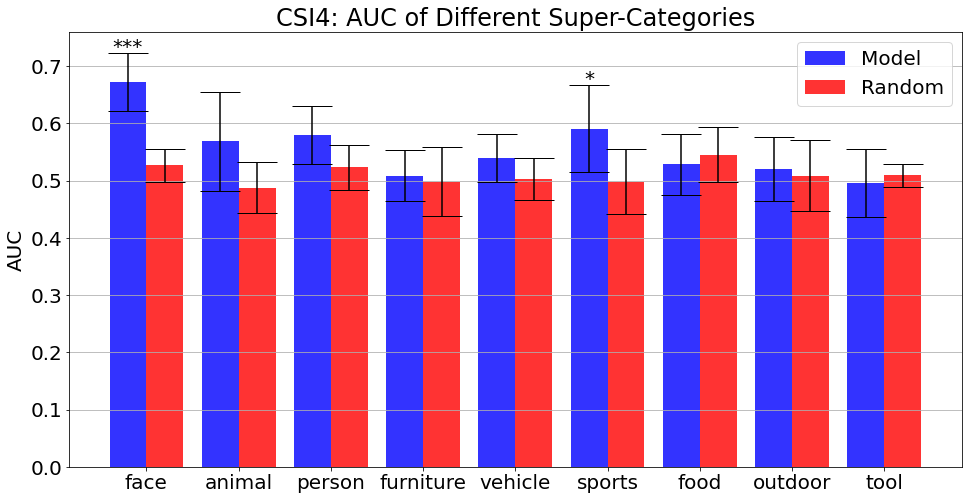

In [68]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories4 = categories
categories4_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI4: AUC of Different Super-Categories', leg_loc='upper right')

Model:
 [[0.829 0.779 0.764 0.672]
 [0.762 0.665 0.694 0.569]
 [0.778 0.693 0.751 0.58 ]
 [0.657 0.597 0.622 0.509]
 [0.675 0.587 0.62  0.54 ]
 [0.731 0.71  0.687 0.591]
 [0.759 0.65  0.658 0.528]
 [0.608 0.573 0.577 0.521]
 [0.605 0.544 0.545 0.495]]
Random:
 [[0.537 0.486 0.509 0.527]
 [0.489 0.484 0.494 0.488]
 [0.501 0.51  0.511 0.523]
 [0.5   0.493 0.502 0.498]
 [0.505 0.501 0.522 0.503]
 [0.503 0.502 0.505 0.498]
 [0.51  0.517 0.501 0.545]
 [0.469 0.489 0.477 0.508]
 [0.498 0.492 0.504 0.509]]
face :
t-statistic: 7.144846465843048 p-value: 0.00018943220220443647
animal :
t-statistic: 4.585513932701706 p-value: 0.0018743470073073368
person :
t-statistic: 4.2805300964503585 p-value: 0.0026012931294649715
furniture :
t-statistic: 3.100699308938839 p-value: 0.010548818496561191
vehicle :
t-statistic: 3.367652529425985 p-value: 0.007543080905717516
sports :
t-statistic: 5.754969715427838 p-value: 0.0005995198567613062
food :
t-statistic: 2.711853231121793 p-value: 0.017509858624053784

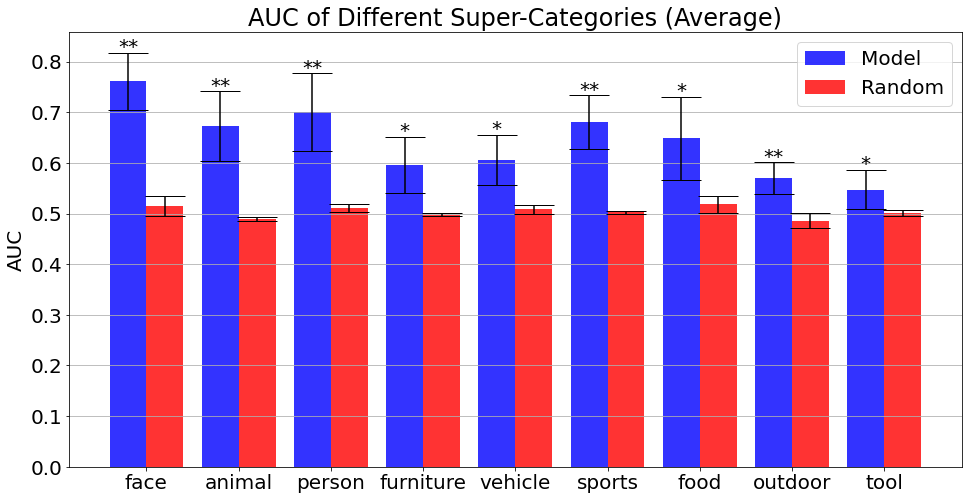

In [72]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
cat1 = np.mean(np.array(categories1), axis=1)
cat2 = np.mean(np.array(categories2), axis=1)
cat3 = np.mean(np.array(categories3), axis=1)
cat4 = np.mean(np.array(categories4), axis=1)
categories = np.array([cat1, cat2, cat3, cat4])
cat1_rand = np.mean(np.array(categories1_rand), axis=1)
cat2_rand = np.mean(np.array(categories2_rand), axis=1)
cat3_rand = np.mean(np.array(categories3_rand), axis=1)
cat4_rand = np.mean(np.array(categories4_rand), axis=1)
categories_rand = np.array([cat1_rand, cat2_rand, cat3_rand, cat4_rand])
print('Model:\n', np.round(np.transpose(categories),3))
print('Random:\n',np.round(np.transpose(categories_rand),3))
CTEs, CTEs_rand, error, error_rand, x_pos = process(np.transpose(categories), np.transpose(categories_rand), names)
pvals_corrected = ttest(names, np.transpose(categories), np.transpose(categories_rand))
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'AUC of Different Super-Categories (Average)', leg_loc='upper right')
